In [ ]:
import pandas as pd


In [ ]:
# For each row set both parents accuracy and training times
def format_df(df):
  df2 = df

  dfa = df2.rename(index=str, columns={'accuracy': 'parenta_accuracy', 'training_time':'parenta_training_time','id': 'id_a'})

  dfa = dfa[["id_a", "parenta_accuracy", "parenta_training_time"]]

  dfb = df2.rename(index=str, columns={'accuracy': 'parentb_accuracy', 'training_time':'parentb_training_time','id': 'id_b'})

  dfb = dfb[["id_b", "parentb_accuracy", "parentb_training_time"]]


  df_final = pd.merge(df, dfa, left_on='parent_a', right_on='id_a')

  df_final = pd.merge(df_final, dfb, left_on='parent_b', right_on='id_b')

  df_final = df_final.drop(columns=["id_a", "id_b"])

  return df_final

In [ ]:
# Merge

df = pd.read_csv('result_with_merge_wine_quality.csv', header=0)
df_merge = format_df(df)

df = pd.read_csv('result_no_merge_wine_quality.csv', header=0)
df_van = format_df(df)


df_merge.info()

df_van.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     180 non-null    object 
 1   parent_a               180 non-null    object 
 2   parent_b               180 non-null    object 
 3   accuracy               180 non-null    float64
 4   loss                   180 non-null    float64
 5   n_epochs               180 non-null    int64  
 6   training_time          180 non-null    float64
 7   parenta_accuracy       180 non-null    float64
 8   parenta_training_time  180 non-null    float64
 9   parentb_accuracy       180 non-null    float64
 10  parentb_training_time  180 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 16.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  

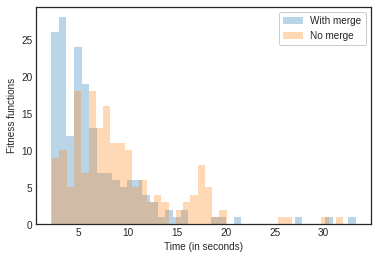

In [ ]:
# Plot

df_merge = df_merge[df_merge["training_time"]<50]
df_van = df_van[df_van["training_time"]<50]

training_time_merge = df_merge[["training_time"]].to_numpy()
accuracy_list_van = df_van[["training_time"]].to_numpy()

#df[["training_time"]].plot.hist(bins=20, alpha=0.5)
#df[["accuracy"]].plot.hist(bins=20, alpha=0.5)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use('seaborn-white')

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(training_time_merge, **kwargs, label='With merge')
plt.hist(accuracy_list_van, **kwargs, label='No merge')

plt.xlabel('Time (in seconds)');
#plt.xlim(min(training_time_list), max(y))

plt.ylabel('Fitness functions')

plt.legend(framealpha=1, frameon=True);


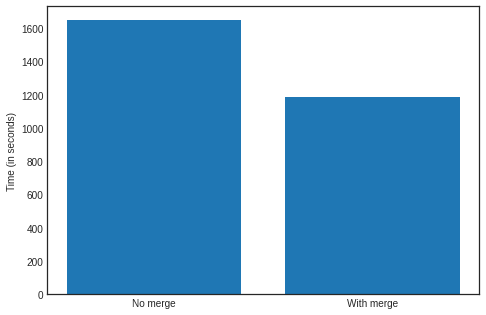

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['No merge', 'With merge']
students = [sum(accuracy_list_van)[0],sum(training_time_merge)[0]]


ax.bar(langs,students)
plt.ylabel('Time (in seconds)')
plt.show()

In [ ]:

print(df_merge.min())
print(df_van.min())

id                       06a1a4e0-7993-4788-ade1-35d6063bd1a5
parent_a                 0cf90c3b-b5b8-4ae7-bd40-3034ffbeb19f
parent_b                 0cf90c3b-b5b8-4ae7-bd40-3034ffbeb19f
accuracy                                              48.0439
loss                                                 0.480439
n_epochs                                                   11
training_time                                         2.21058
parenta_accuracy                                      48.0439
parenta_training_time                                 2.29705
parentb_accuracy                                      48.0439
parentb_training_time                                 2.29705
dtype: object
id                       004e4f30-a07c-495a-85f2-58d489d162b6
parent_a                 004e4f30-a07c-495a-85f2-58d489d162b6
parent_b                 004e4f30-a07c-495a-85f2-58d489d162b6
accuracy                                              44.9368
loss                                                 0.4

In [ ]:
print(df_merge[["accuracy", "loss", "n_epochs", "training_time"]].describe())

         accuracy        loss    n_epochs  training_time
count  178.000000  178.000000  178.000000     178.000000
mean   152.900887    1.529009   32.286517       6.653974
std    176.116754    1.761168   26.252833       4.779483
min     48.043865    0.480439   11.000000       2.210578
25%     50.743644    0.507436   15.000000       3.406204
50%     57.244626    0.572446   25.000000       5.242614
75%    141.928935    1.419289   40.750000       8.065466
max    566.484356    5.664844  183.000000      33.245068


In [ ]:
print(df_van[["accuracy", "loss", "n_epochs", "training_time"]].describe())

         accuracy        loss    n_epochs  training_time
count  178.000000  178.000000  178.000000     178.000000
mean   149.955040    1.499550   41.061798       9.262762
std    167.152216    1.671522   27.094345       5.305955
min     44.936809    0.449368   11.000000       2.315225
25%     49.714362    0.497144   24.250000       5.372504
50%     57.607150    0.576072   36.000000       7.876526
75%    177.851054    1.778511   50.000000      11.354382
max    566.532373    5.665324  204.000000      31.982385


In [ ]:
# https://en.wikipedia.org/wiki/Skewness

df_van[[ "training_time"]].skew()


training_time    1.471797
dtype: float64

In [ ]:
df_merge[[ "training_time"]].skew()

training_time    2.675971
dtype: float64